In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, roc_auc_score

#Set a consistent plotting style for better visualization 
sns.set(style='whitegrid')  

This initial code block is serving as the foundation for the entire project. It is downloading all of the libraries and tools that I plan to use throughout this notebook. I am importing Pandas as our primary tool for data manipulation, allowing me to work with data in a structured, table-like format called a Data frame. Numpy is imported for numerical operations, especially on arrays. For the visualization part of the project, I am using matplotlib.pyplot for basic plotting and seaborn, which is built on top of Matplotlib and allows me to create mroe statistically-informed and aesthetically pleasing plots with less code. 

Another library that I am downloading is scikit-learn, which is the industry standard libary for machine learning in Python. From it, I am specifically importing modules for data splitting, model selection, and data preprocessing. The two machine learning models that I am using are logistic regression and random forest, along with metrics to evaluate their performance. Finally, sns.set is used to configure a default visual style to make sure all of the future plots and graphs look clean and are easy to read.  

In [2]:
#The Dataset is hosted by the UCI machine learning repository
#Load data 
column_names =['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']
df = pd.read_csv('breast-cancer.data', header=None, names=column_names, na_values='?')

#Initial Inspection 
#display the first few rows and a summary of the dataset
print("\nDataset Information: ")
df.info()
print("First 5 rows of the dataset: ")
display(df.head())


Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    278 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  285 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB
First 5 rows of the dataset: 


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


This block handles the first step of getting the data into a workable structure. We import our dataset using read_csv. Since the original file does not have a header row, I used the header=none code and then explicitly provide the list of column names given in the assignment with the names argument. I also used the na_values='?' and replaced it with a NaN (not a number), which is standard for missing data. This makes it easier to count and handle the missing values later. 

***Exploratory Data Analysis***

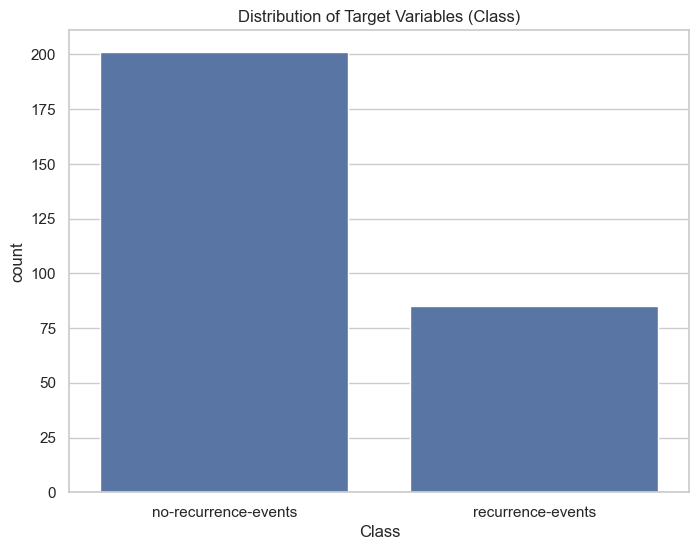


Class Distribution:
 Class
no-recurrence-events    201
recurrence-events        85
Name: count, dtype: int64


In [3]:
plt.figure(figsize=(8,6))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Target Variables (Class)')
plt.show()
print("\nClass Distribution:\n", df['Class'].value_counts())


This section of code provides the numerical breakdown of the project's target variable. This code counts the occurrences of each unique category in the Class column, which represents the patient's outcome after their initial cancer treatment. The ouput confirms that the dataset has 201 instances of no-recurrence-events (patients who remained cancer free) and 85 instances of recurrence-events (patients whose cancer returned). This reveals a significant class imbalance, with the non-recurring outcome appearing abotu 2 times more frequently. This imbalance is crucial, since it highlights that a simple accuracy score would be misleading and that a metric that can evaluate the model's ability to predict the rarer outcome of cancer recurrence. 

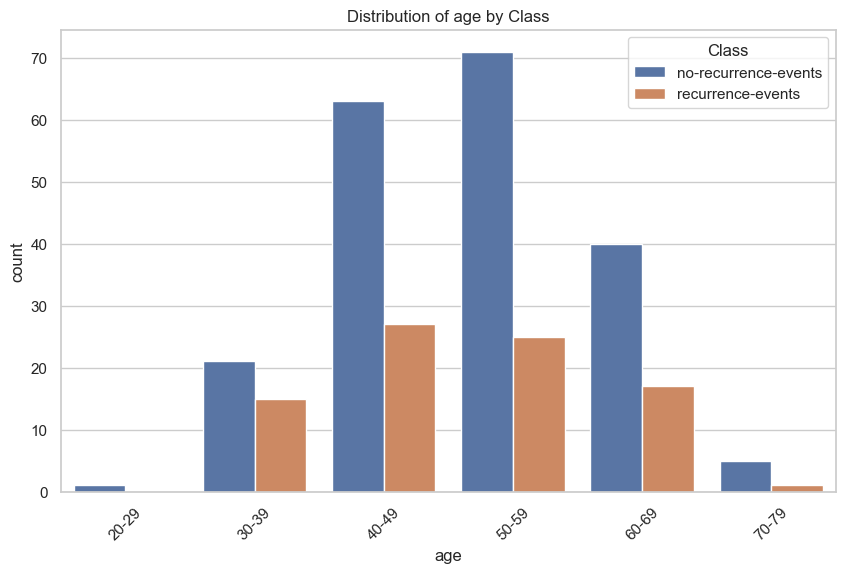

Breakdown for: age
Class  no-recurrence-events  recurrence-events  All
age                                                
20-29                     1                  0    1
30-39                    21                 15   36
40-49                    63                 27   90
50-59                    71                 25   96
60-69                    40                 17   57
70-79                     5                  1    6
All                     201                 85  286


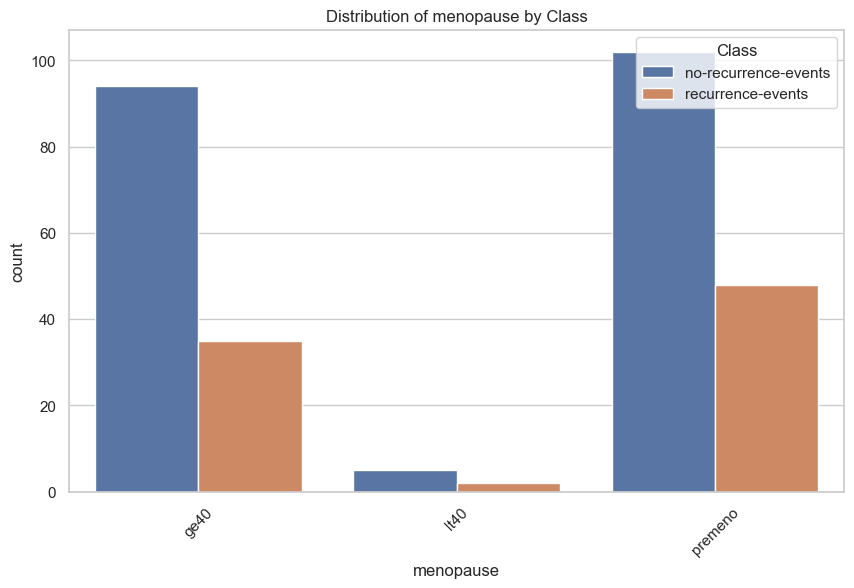

Breakdown for: menopause
Class      no-recurrence-events  recurrence-events  All
menopause                                              
ge40                         94                 35  129
lt40                          5                  2    7
premeno                     102                 48  150
All                         201                 85  286


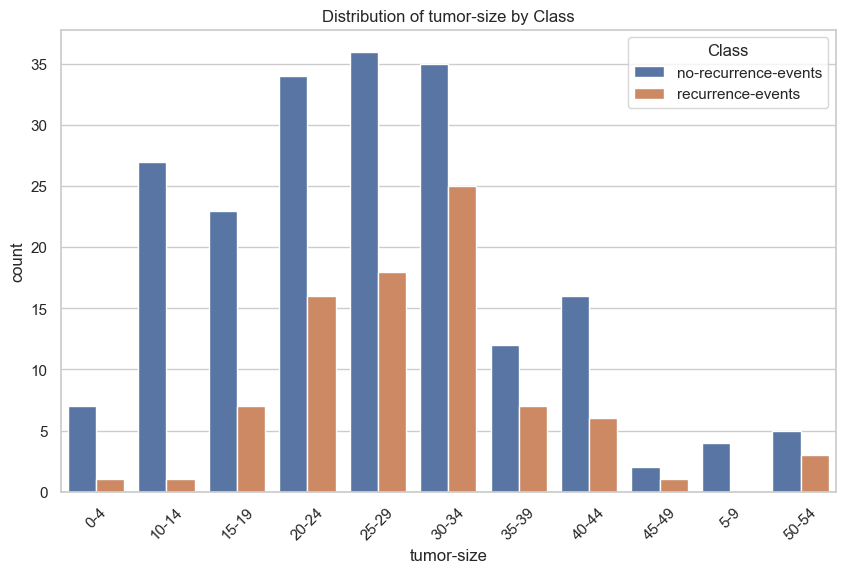

Breakdown for: tumor-size
Class       no-recurrence-events  recurrence-events  All
tumor-size                                              
0-4                            7                  1    8
10-14                         27                  1   28
15-19                         23                  7   30
20-24                         34                 16   50
25-29                         36                 18   54
30-34                         35                 25   60
35-39                         12                  7   19
40-44                         16                  6   22
45-49                          2                  1    3
5-9                            4                  0    4
50-54                          5                  3    8
All                          201                 85  286


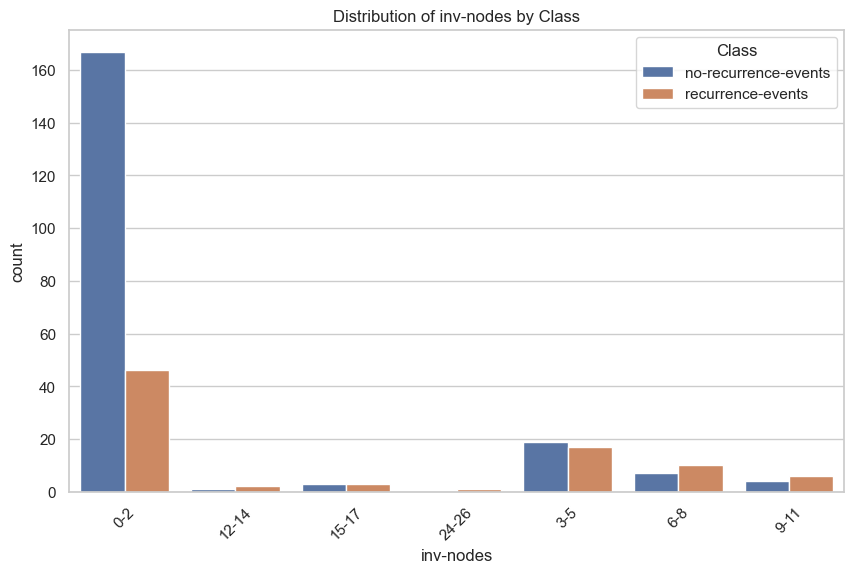

Breakdown for: inv-nodes
Class      no-recurrence-events  recurrence-events  All
inv-nodes                                              
0-2                         167                 46  213
12-14                         1                  2    3
15-17                         3                  3    6
24-26                         0                  1    1
3-5                          19                 17   36
6-8                           7                 10   17
9-11                          4                  6   10
All                         201                 85  286


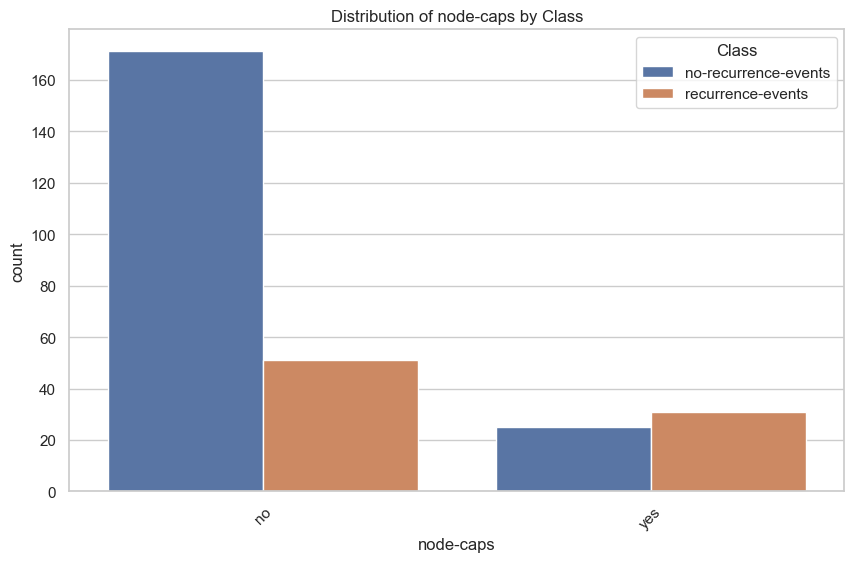

Breakdown for: node-caps
Class      no-recurrence-events  recurrence-events  All
node-caps                                              
no                          171                 51  222
yes                          25                 31   56
All                         196                 82  278


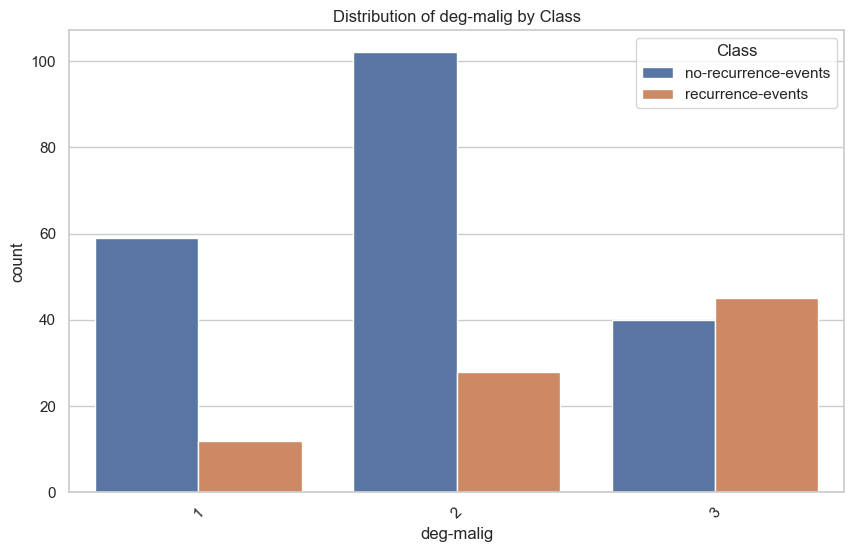

Breakdown for: deg-malig
Class      no-recurrence-events  recurrence-events  All
deg-malig                                              
1                            59                 12   71
2                           102                 28  130
3                            40                 45   85
All                         201                 85  286


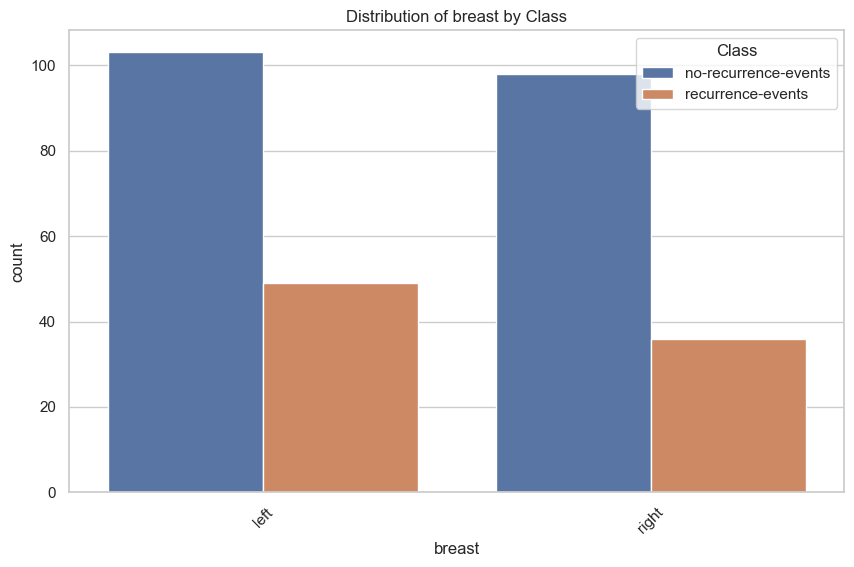

Breakdown for: breast
Class   no-recurrence-events  recurrence-events  All
breast                                              
left                     103                 49  152
right                     98                 36  134
All                      201                 85  286


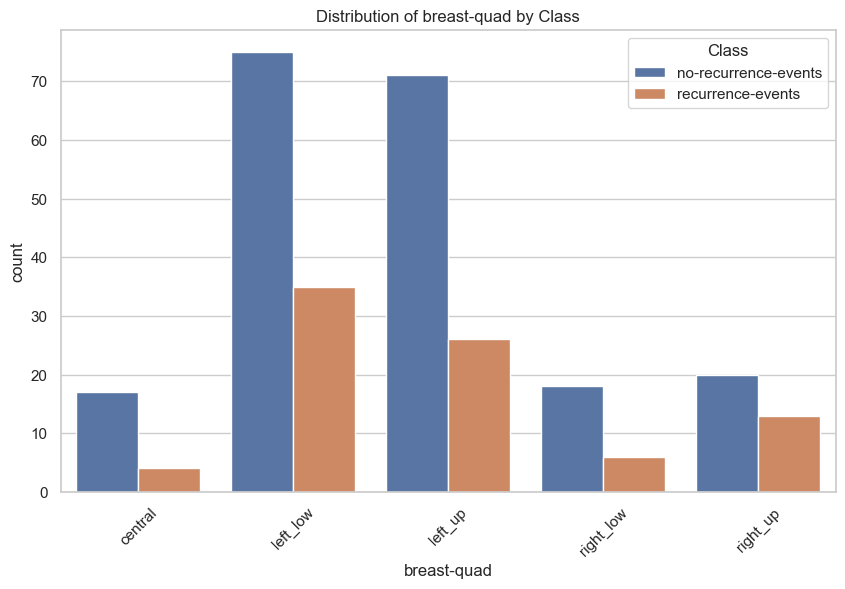

Breakdown for: breast-quad
Class        no-recurrence-events  recurrence-events  All
breast-quad                                              
central                        17                  4   21
left_low                       75                 35  110
left_up                        71                 26   97
right_low                      18                  6   24
right_up                       20                 13   33
All                           201                 84  285


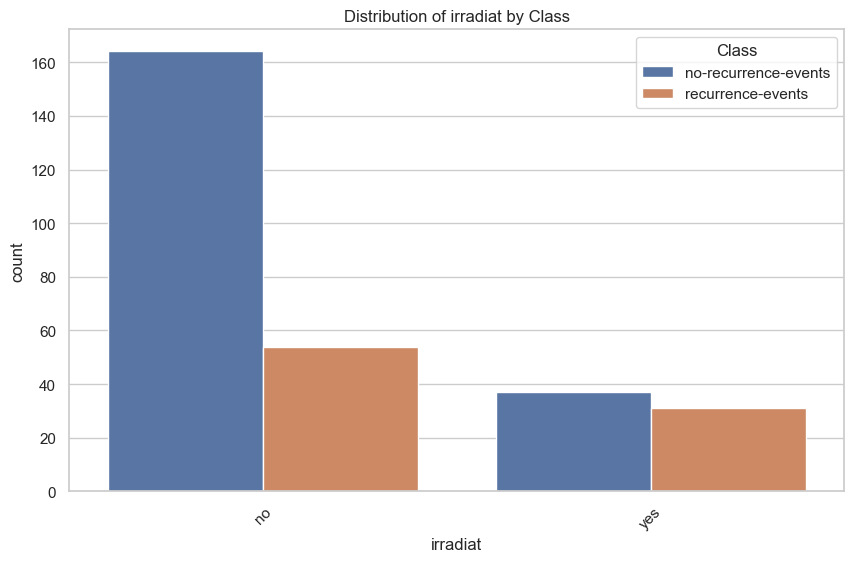

Breakdown for: irradiat
Class     no-recurrence-events  recurrence-events  All
irradiat                                              
no                         164                 54  218
yes                         37                 31   68
All                        201                 85  286


In [4]:
#List of all feature columns 
feature_columns = df.columns.drop('Class')

#loop through each feature column to create a plot 
for feature in feature_columns:
    plt.figure(figsize=(10,6))

    #create a count plot, coloring the bars by the 'clas variable'
    sns.countplot(x=feature, hue='Class', data=df, order=sorted(df[feature].dropna().unique()))

    
    plt.title(f'Distribution of {feature} by Class')
    plt.xticks(rotation=45)
    plt.legend(title='Class', loc='upper right')
    plt.show()

    print(f"Breakdown for: {feature}")

    contingency_table = pd.crosstab(df[feature], df['Class'], margins=True)
    print(contingency_table)

This part of the code uses a loop to make graphs that show the number of recurrence-events and no-recurrence-events for each feature. This allows us to compare the proportions directly. 

The numerical breakdown given by the tables confirms a clear hierachy of predictive signals among the features, with the strongest features being directly related to the tumor's physical and biological aggressiveness. Features such as the degree of malignancy (deg-malig), the presence of node capsulation (node-caps), and the number of involved lymph nodes (inv-nodes), and the overall tumor-size show the most significant correlation with patient outcomes. 

For example, the recurrence rate grows from just 16.9% for tumors with the lowest malignancy grade to 52.9% for those with the highest. Similarly, the presence of node caps or the involvements of 3-5 lymph nodes more than doubles the statistical likelihood of recurrence when compared to the respective baseline categories. 

On the other hand, other features show a more complex or weaker relationship with the outcome. Patient age, for example, shows a more non-linear trend, with the 30-39 age group showing a high recurrence rate of 41.7%. The use of radiation is also highly correlated with recurrence, but it is probably closer related to the initial severity of the cancer rather than a cause for it to come back. 

Finally, features related to the tumor's location like breast side and breast-quad, show minimal predictive value. This is because the reccurence rates are nearly the same across their categories. 


**Data preprocessing and encoding**

In [5]:
#Data preprocessing and encoding :D

print("Missing values before imputation")
print(df.isnull().sum())

# Impute the missing values for the columns with their modes
for col in ['node-caps', 'breast-quad']:
    # Calculate the mode for each column. .mode() returns a Series, so take the first item [0].
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

#Verify that all the missing values have been handled
print("\nMissing values after imputation")
print(df.isnull().sum())


Missing values before imputation
Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
dtype: int64

Missing values after imputation
Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64


/var/folders/q3/hnb035p92t55kw0t1m7t48200000gn/T/ipykernel_16685/3372351398.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


This block of code is the first critical data cleaning step. Machine learning algorithms can't process datasets with missing entries, so we have to first address all of the NaN values we found at the begining. We did this with "mode imputation". For each column that has missing data, the mode (most common category) is found using the .mode()[0] method. The .fillna() function is then used to replace all of the NaN instances in the column. This is useful because it fills any missing value with the most probable value without significantly altering the feature's original distribution. After doing this, the dataset is now complete with zero missing entries. 

In [6]:
#Creating copy of the dataframe to keep original data intact
df_encoded = df.copy()

#step 1! Encode the target variable 'Class' using Label Encoding
#Converts 'no-recurrence-events' to 0 and 'recurrence-events' to 1
le = LabelEncoder()
df_encoded['Class'] = le.fit_transform(df_encoded['Class'])

#step 2! Separate features (x) and target variable (y)
X=df_encoded.drop('Class', axis=1)
y=df_encoded['Class']

#step 3! One-hot encode categorical features
X = pd.get_dummies(X, drop_first=False).astype(int)

#display the first few rows + new shape 
print("\nEncoded Feature Set Shape: ", X.shape)
print("\nFirst 5 rows of Encoded Feature Set: ")
display(X.head())


Encoded Feature Set Shape:  (286, 39)

First 5 rows of Encoded Feature Set: 


,deg-malig,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,menopause_premeno,...,node-caps_yes,breast_left,breast_right,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,3,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1,2,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,2,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
4,2,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0


This code block completes the transformation of the dataset into a fully numerical format for machine learning. Using scikit-learn's LabelEncoder to convert the target variable, Class, into binary format (0 for no recurrence, 1 for recurrence), which is the standard for models like this. For the predictor features, the pd.get_dummies() function was used. This function performs the one-hot encoding, which deconstructs each feature column into multiple new binary columns, where a 1 indicates the presence of that category for a given patient. The output shows that the original 9 feature columns have been expanded into 39 columns. 

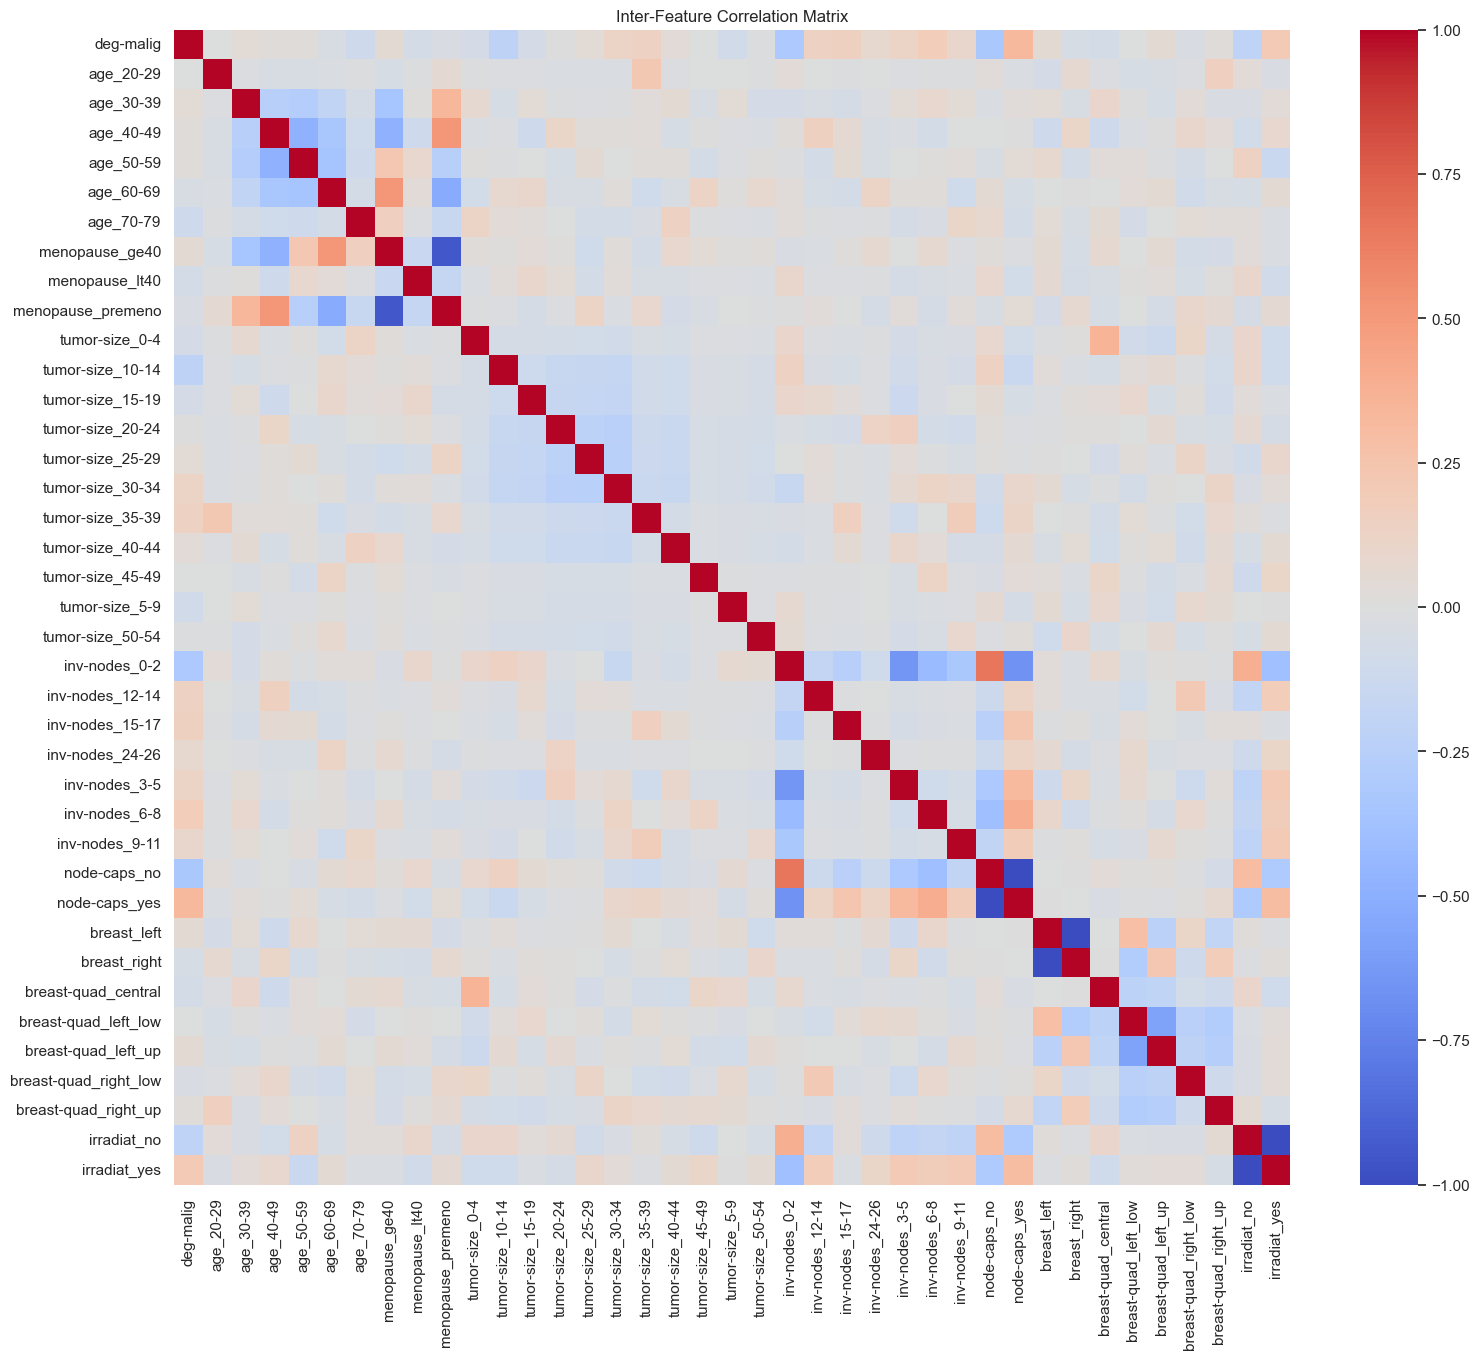

In [7]:
#calculating the correlation of features
feature_corr_matrix=X.corr()

#visualize matrix using heatmap 
plt.figure(figsize=(18,15))
sns.heatmap(feature_corr_matrix, cmap='coolwarm')
plt.title('Inter-Feature Correlation Matrix')
plt.show()

This heatmap provides a comprehensive visualization of the inter-feature correlation, showing the relationship between every pair of our set of 39 features. The bright red diagonal line shows that every feature is perfectly correlated with itself and the main focus is the off-diagonal squares that reveal the data's internal structure. 

The most prominent patterns are the large, perfectly defined blue squares. These blocks show a perfect negative correlation and are a direct and expected result of the one-hot encoding process. For example, within the block of age features, if a patient belongs to the age_30-39 category, they cannot simultaneously belong to age_50-59. This results in a negative correlation between those two columns. This block-like pattern repeats for every original categorical feature (tumor-size, breast-quad, etc.).

The most critical insight from this map comes from looking at the areas between these blue blocks. The faintly red or blue squares show the weaker correlations between features from different original categories (ex between an age feature and a tumor-size feature). Since there are not any strong hot spots of correlation between the separate groups, we know there is no major data redundancy. 


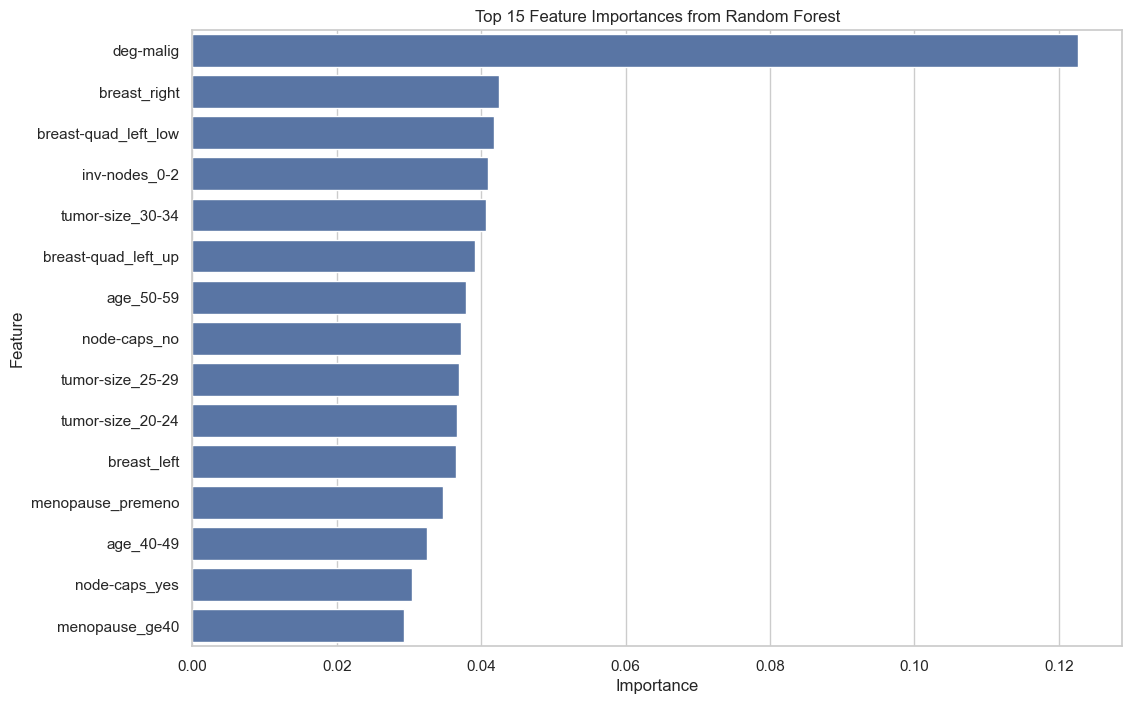

In [8]:
#algorithmic EDA
#train random forest model on full dataset
prelim_rf = RandomForestClassifier(random_state=42)
prelim_rf.fit(X, y)

#extract feature importances
importances = prelim_rf.feature_importances_
feature_names = X.columns

#create dataframe for visualization 
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

#sort by importance and plot top 15
top_features = feature_importances.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 15 Feature Importances from Random Forest')
plt.show()


By training a random forest model, we have leveraged the internal decision-making process to rank the 39 features by their predictive power. The results provide a confirmation of the earlier visual and numerical findings. 

The single most important feature by a significant margin is deg-malig (the degree of malignancy). This tells us that the tumor's biological grade is the most critical piece of information that the model uses to distinguish between recurrence and non-recurrence. Following this are features that consistently appeared as strong indicators in the other analysis: breat_right, node-caps_yes, menopause_premeno, and other features derived from tumor size and age. 

This plot is important because it validates what was observed earlier. The features identified as having a strong "signal" during the visual exploration are the same features that the algorithm identified as important. 

***Model Creation :D***

In [9]:
from sklearn.model_selection import train_test_split
#Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Print the shapes of the datasets to confirm the split
print("Training Feature Set Shape: ", X_train.shape)
print("Testing Feature Set Shape: ", X_test.shape)
print("Training Target Set Shape: ", y_train.shape)
print("Testing Target Set Shape: ", y_test.shape)



Training Feature Set Shape:  (228, 39)
Testing Feature Set Shape:  (58, 39)
Training Target Set Shape:  (228,)
Testing Target Set Shape:  (58,)


This block of code breaks the data into two components for the machine learning models. Using scikit-learn's train_test_split function to use 80% of the data for training the models and reserving the remaining 20% for final testing. Setting a random_state is standard, since it guarantees that the split is deterministic (the same rows will go into the training and testing sets everytime to code is run, which helps with reproducible results). 

The stratify=y parameter was also used. Since there was a class imbalance earlier, stratification ensures that the proportion of recurrence-events to no-recurrence-events is the same in both the training and testing sets as it is in the original dataset. This prevents the possibility of an unlucky split where the testing set has a disproportionately low number of recurrence cases, which would lead to an unreliable evaluation of the model's performance. 

The final printout confirms that the data was divided correctly. 

****Logistic Regression****

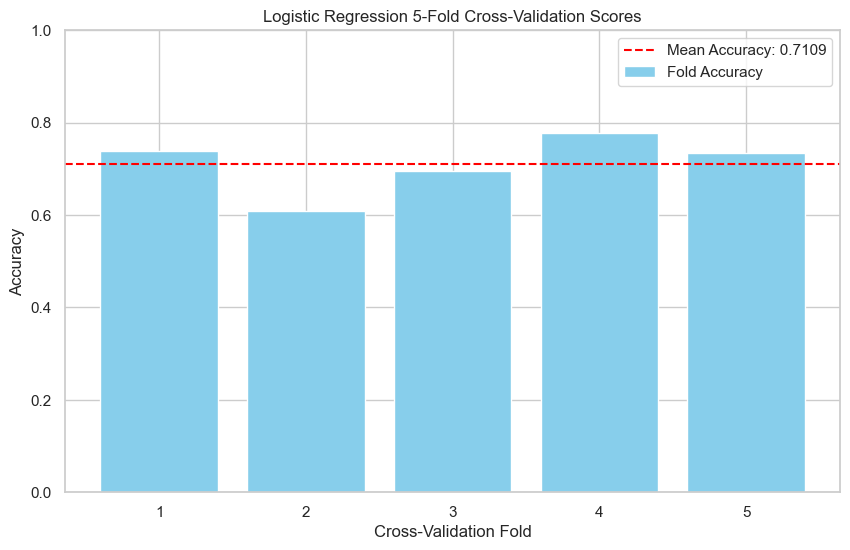

logistic regression 5-Fold Cross-Validation Accuracies: [0.73913043 0.60869565 0.69565217 0.77777778 0.73333333]
Mean Cross-Validation Accuracy: 0.7109
Standard Deviation of Accuracies: 0.0574


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

#initialize the model 
#set max iteration to 1000 to ensure convergence
log_reg = LogisticRegression(max_iter=1000, random_state=42)

#perform 5-fold cross validation on the training set
#scoring accuracy to evaluate model performance
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')    

#Plotting!

mean_accuracy = np.mean(cv_scores)

#create bar plot 
plt.figure(figsize=(10,6))
plt.bar(range(1,6), cv_scores, color='skyblue', label='Fold Accuracy')
plt.axhline(mean_accuracy, color='red', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.4f}')

#add labels and title
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.title('Logistic Regression 5-Fold Cross-Validation Scores')
plt.ylim(0, 1.0)
plt.xticks(range(1, 6))
plt.legend()
plt.show()

#print numerical results for the record
print(f"logistic regression 5-Fold Cross-Validation Accuracies: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracies: {np.std(cv_scores):.4f}")



The outputs from this step provide a robust evaluation of our baseline Logistic Regression model on the updated feature set. The array of accuracy scores, [0.739, 0.609, 0.696, 0.778, 0.733], is the direct result of the 5-fold cross-validation process, with each score representing the model's performance on a different subset of the training data. The bar chart provides a direct visualization of this array, making the model's performance and stability easy to interpret.

While there is still some fluctuation between the folds, with a performance peak of nearly 78% on the fourth fold and a drop to 61% on the second, the model shows reasonable consistency.

The mean cross-validation accuracy of 0.7109 (shown by the red dashed line on the chart) is the most reliable estimate of the model's predictive power on the data. It shows that, on average, the model can correctly predict the outcome for about 71.1% of the patients. The standard deviation of 0.0574 quantifies this variability. It indicates that the model's performance is sensitive to the specific data it is trianed on. It also shows a clear and solid baseline for the project: any more complex model built must perform better than the 71.1% average accuracy. 

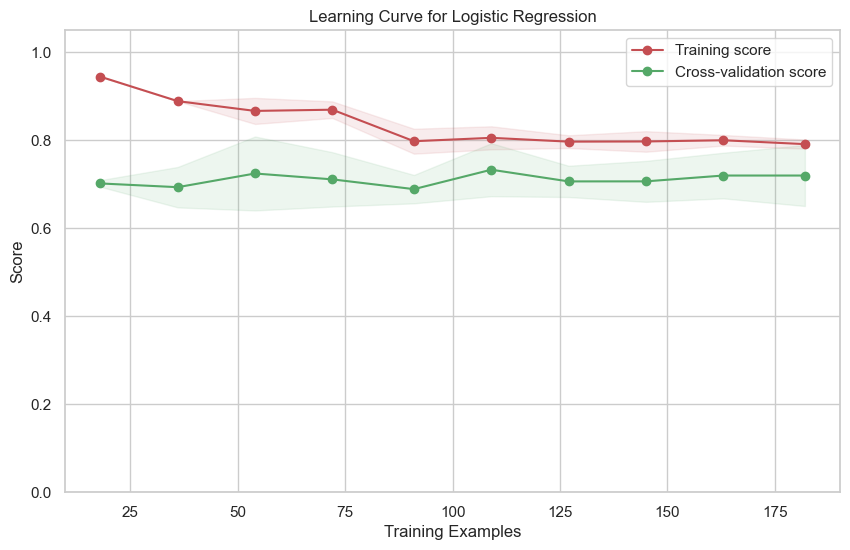

In [11]:
#Learnign curve for logistic regression
estimator = LogisticRegression(max_iter=1000, random_state=42)

#generate the data for the learning curve
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(
    estimator, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(.1, 1.0, 10)
)

#calculate mean and standard deviation for training and test scores
train_scores_mean_lr = np.mean(train_scores_lr, axis=1)
train_scores_std_lr = np.std(train_scores_lr, axis=1)
test_scores_mean_lr = np.mean(test_scores_lr, axis=1)
test_scores_std_lr = np.std(test_scores_lr, axis=1)

#plot the learning curve
plt.figure(figsize=(10,6))
plt.fill_between(train_sizes_lr, train_scores_mean_lr - train_scores_std_lr,
                 train_scores_mean_lr + train_scores_std_lr, alpha=0.1, color="r")
plt.fill_between(train_sizes_lr, test_scores_mean_lr - test_scores_std_lr,
                 test_scores_mean_lr + test_scores_std_lr, alpha=0.1, color="g")
plt.plot(train_sizes_lr, train_scores_mean_lr, 'o-', color="r", label="Training score")
plt.plot(train_sizes_lr, test_scores_mean_lr, 'o-', color="g", label="Cross-validation score")  

plt.ylim(0, 1.05)
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

This learning curve provides a clear diagnosis of the Logistic Regression model's behavior and its trade-offs between bias and variance. The plot demonstrates that while the red training score is consistently higher than the green cross-validation score, the gap between them is relatively stable and does not widen as more data is added. This is the visual confirmation that the model is not suffering from severe overfitting (high variance). Its performance on seen versus unseen data is fairly consistent, indicating that it generalizes reasonably well.

However, the visualization also shows both of the curves plateauing at an accuracy level below 1.0. This is a classic signature of a model with high bias, its underlying simplicity prevents it from capturing the more complex patterns in the data, regardless of how many training examples it is given. This analysis is crucial because it helps show that this model is stable and well generalized, but is limited by its simplicity. 

***Random Forest Model***

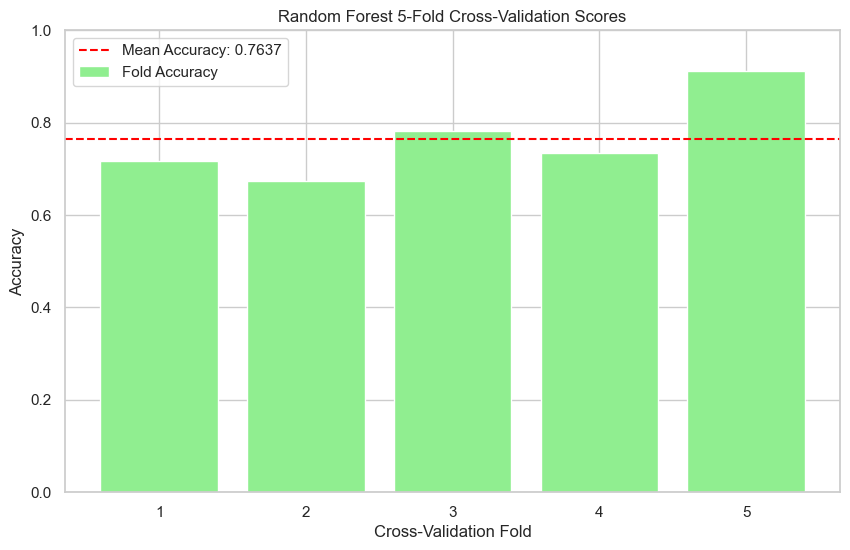

Random Forest 5-Fold Cross-Validation Accuracies: [0.7173913  0.67391304 0.7826087  0.73333333 0.91111111]
Mean Cross-Validation Accuracy: 0.7637
Standard Deviation of Accuracies: 0.0815


In [12]:
#initialize and train the random forest model 
#set random_state for reproducibility
rf = RandomForestClassifier(random_state=42)

#perform 5-fold cross validation on the training set
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

#plot directly from the results
mean_accuracy = np.mean(cv_scores)

#bar plot from the scores 
plt.figure(figsize=(10,6))
plt.bar(range(1,6), cv_scores, color='lightgreen', label='Fold Accuracy')
plt.axhline(mean_accuracy, color='red', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.4f}')

#add labels and title
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.title('Random Forest 5-Fold Cross-Validation Scores')
plt.ylim(0, 1.0)
plt.xticks(range(1, 6))
plt.legend()
plt.show()

#also print numerical results
print(f"Random Forest 5-Fold Cross-Validation Accuracies: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracies: {np.std(cv_scores):.4f}")


The results from the 5-fold cross-validation on the default Random Forest model are  strong and show a clear performance gain over the baseline. The model achieved a Mean Cross-Validation Accuracy of 0.7637, or about 76.4%. This represents an improvement of more than 5 percentage points over the Logistic Regression model's average accuracy of 71.1%. This performance increase confirms that the Random Forest's more complex approach is better suited to capturing the non-linear patterns within the data than the simpler linear model.

The bar chart visually confirms this, with the red dashed line for the mean accuracy sitting above the baseline from before. The plot also reveals something about the model's variance. While the performance is strong on average, it is not the most stable since it peaks at 91.1% and goes as low as 67.4%. While this is less stable than the logistic regression, the random forest's higher average performance makes it clear that it is better suited for this data. 

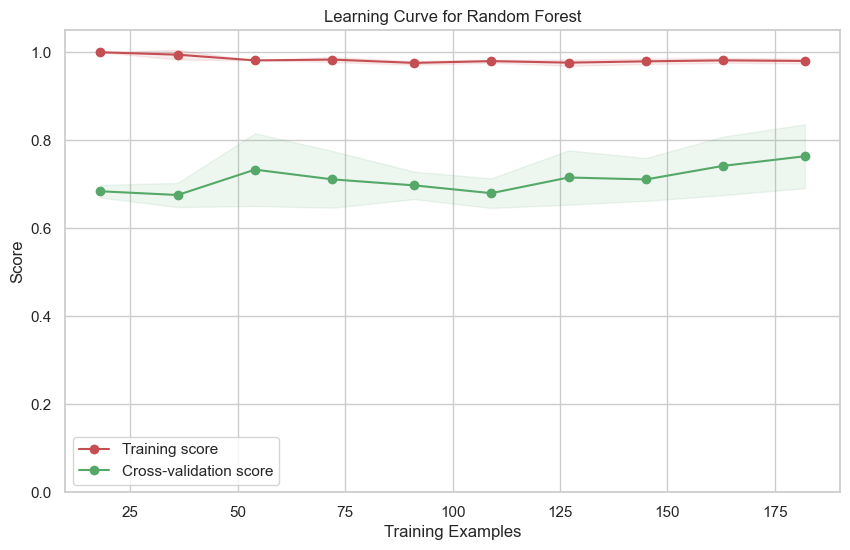

In [13]:
#learning curve for random forest
estimator = RandomForestClassifier(random_state=42)

#generate the data for the learning curve
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(
    estimator, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(.1, 1.0, 10)
)

#calculate mean and standard deviation for training and test scores
train_scores_mean_rf = np.mean(train_scores_rf, axis=1)
train_scores_std_rf = np.std(train_scores_rf, axis=1)
test_scores_mean_rf = np.mean(test_scores_rf, axis=1)
test_scores_std_rf = np.std(test_scores_rf, axis=1)

#plot the learning curve`
plt.figure(figsize=(10,6))
plt.fill_between(train_sizes_rf, train_scores_mean_rf - train_scores_std_rf,
                 train_scores_mean_rf + train_scores_std_rf, alpha=0.1, color="r")
plt.fill_between(train_sizes_rf, test_scores_mean_rf - test_scores_std_rf,
                 test_scores_mean_rf + test_scores_std_rf, alpha=0.1, color="g")
plt.plot(train_sizes_rf, train_scores_mean_rf, 'o-', color="r", label="Training score")
plt.plot(train_sizes_rf, test_scores_mean_rf, 'o-', color="g", label="Cross-validation score")

plt.ylim(0, 1.05)
plt.title('Learning Curve for Random Forest')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

This learning curve helps provide a visual diagnosis of the untuned model's behavior. The most prominent feature in this graph is the large gap between the red training curve and the green cross-validation curve. The training score is pretty close to a 1, which indicates that the model's complexity allows it to completely memorize the training data. The cross-validation score, however, is lower at about 75%. This gap is visual evidence of overfitting. The model has learned the noise of the training data, which prevents it from generalizing to the new, unseen data. 

Comparing this graph to the one from the logistic regression model, we can determine that the logistic regression model was simple but stable, while the random forest is powerful but is prone to overfitting. 

This shows that some hyperparameter tuning may be needed to help reduce the gap between training and cross-validation scores, creating a better final model. 

***Hyperparameter Tuning for the Random Forest Model!!***

In [14]:
#define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200], #number of trees in the forest
    'max_depth': [None, 10, 20],    #maximum depth of each tree
    'min_samples_split': [2, 5, 10],    #minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]   #minimum samples required at each leaf node
}

#initialize the random forest model
rf_grid = RandomForestClassifier(random_state=42)

#initialize the grid search w/ 5-fold cross validation for each combo 
grid_search = GridSearchCV(estimator=rf_grid, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

#after the grid search is complete, print the best parameters and best score
print("\nBest Hyperparameters from Grid Search: ")
print(grid_search.best_params_)

#print the best cross-validation score achieved with these hyperparameters
print(f"\nBest Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_dep

The hyperparameter tuning process, done using GridSearchCV, represents the effort to optimize the random forest model and address the potential for overfitting. The algorithm systematically evaluated 81 combinations of hyperparameter, running a total of 405 model fits to ensure an indepth evaluation. The search concluded that the best model configuration consists of {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}. 

This optimized model achieved a best cross-validation accuracy of 79.00%. This is a very significant improvement over both the default Random Forest's accuracy of 76.4% and the baseline Logistic Regression's 71.1%. The process of tuning hyperparameters that control the model's complexity is a direct technique to combat overfitting. By selecting 

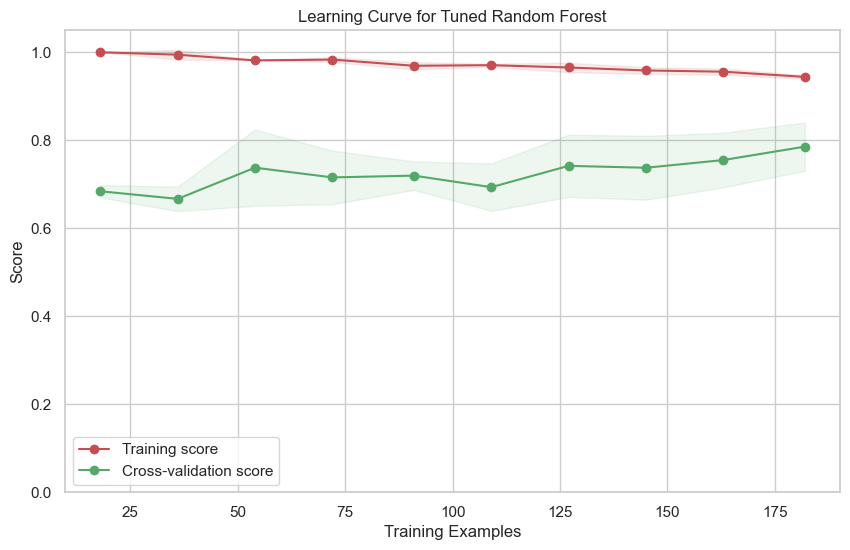

In [15]:
#plot after hyperparameter tuning
estimator_tuned = grid_search.best_estimator_

#generate the data for the learning curve of the tuned model
train_sizes_tuned, train_scores_tuned, test_scores_tuned = learning_curve(
    estimator_tuned, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(.1, 1.0, 10)
)   

#calculate mean and standard deviation for training and test scores of tuned model
train_scores_mean_tuned = np.mean(train_scores_tuned, axis=1)
train_scores_std_tuned = np.std(train_scores_tuned, axis=1)
test_scores_mean_tuned = np.mean(test_scores_tuned, axis=1)
test_scores_std_tuned = np.std(test_scores_tuned, axis=1)   

#plot the learning curve for the tuned model
plt.figure(figsize=(10,6))
plt.fill_between(train_sizes_tuned, train_scores_mean_tuned - train_scores_std_tuned,
                 train_scores_mean_tuned + train_scores_std_tuned, alpha=0.1, color="r")
plt.fill_between(train_sizes_tuned, test_scores_mean_tuned - test_scores_std_tuned,
                 test_scores_mean_tuned + test_scores_std_tuned, alpha=0.1, color="g")
plt.plot(train_sizes_tuned, train_scores_mean_tuned, 'o-', color="r", label="Training score")
plt.plot(train_sizes_tuned, test_scores_mean_tuned, 'o-', color="g", label="Cross-validation score")    

plt.ylim(0, 1.05)
plt.title('Learning Curve for Tuned Random Forest')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

This final learning curve serves as the definitive proof of the effect of our hyperparameter tuning. When compared to the learning curve of the untuned model, the improvement is noticeable. The gap between the red training score and the green cross-validation score has narrowed, and the cross-validation score itself has achieved a slightly higher and more stable plateau.

However, it is important to note that while the tuning has helped fix the overfitting, it has not completely eliminated it. The training score remains pretty high, indicating that the model still has the capacity to memorize a significant portion of the training data. This suggests that the dataset may be complex and is giving the random forest model a hard time trying to figure out a generalizable pattern. 

Therefore, the tuning efforts were successful in finding a good trade-off between bias and variance, but not at creating a "perfect" model. By doing this, it is confirmed that a 79% cross-validation accuracy is likely the best performance we can perform with this algorithm. 

**Final evaluation with test set + confusion matrices**

***Logistic Regression***

Steps: 
1. Train model one last time on entire training set 
2. Make predictions on the test set
3. Visualize the confusion matrix, print detailed report, and plot it!

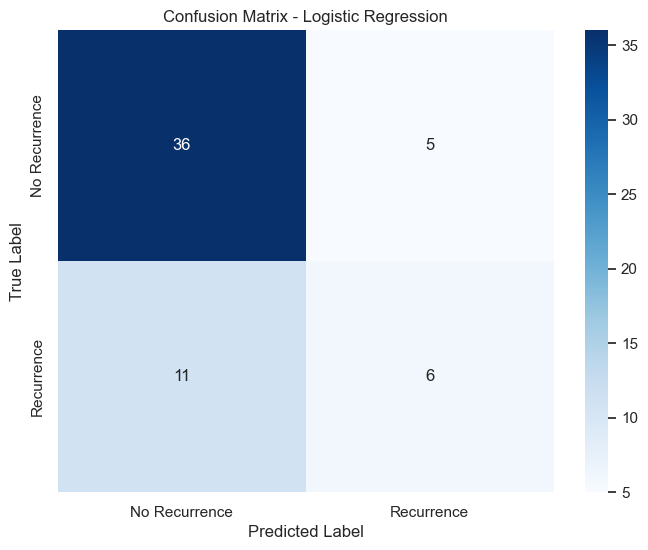


Classification Report - Logistic Regression:

               precision    recall  f1-score   support

No Recurrence       0.77      0.88      0.82        41
   Recurrence       0.55      0.35      0.43        17

     accuracy                           0.72        58
    macro avg       0.66      0.62      0.62        58
 weighted avg       0.70      0.72      0.70        58



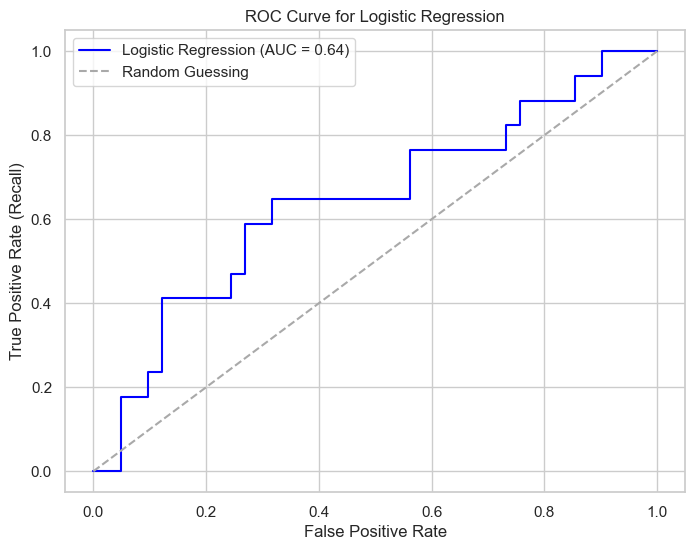

In [16]:
#Final logisitc regression model training and evaluation

log_reg_final = LogisticRegression(max_iter=1000, random_state=42)
log_reg_final.fit(X_train, y_train)
y_pred_lr = log_reg_final.predict(X_test)
y_prob_lr = log_reg_final.predict_proba(X_test)[:, 1] # Get probabilities for ROC curve

#output 1: confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8,6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Recurrence', 'Recurrence'],
            yticklabels=['No Recurrence', 'Recurrence'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#output 2: classification report
print("\nClassification Report - Logistic Regression:\n")
print(classification_report(y_test, y_pred_lr, target_names=['No Recurrence', 'Recurrence']))

#output 3: ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


**Logistic Regression Analysis**

The final evaluation of the baseline logistic regression model on the unseen test set provides a complete picture of the performance. The model achieved a final overall accuracy of 72%, which is pretty consistent with the 71.1% mean accuracy we got during the cross-validation. This consistency confirms that the model generalized well and that the overfitting analysis was correct. 

A deeper analysis reveals the model's significant limitations, particularly concerning the minority "Recurrence" class. The confusion matrix provides the data for this insight. It shows that the model correctly identified 36 of the 41 non-recurrence cases (true negatives) but only managed to correctly identify 6 of the 17 actual recurrence cases (true positives). The most critical metric on the matrix is the 11 false negatives, representing the 11 patients whose cancer recurrence was missed by the model. 

The classification report quantifies the impact of these errors. The model's performance on the "Recurrence" class is poor, with a recall of only .35, which means the model failed to detect 65% of the actual cancer recurrences. This is a really bad number for a medical diagnostic model. While a precision of 0.55 indicates that the positive predicitons were correct more often then not, this is undermined by the failure to identify the majority of positive cases. 

Finally, the ROC curve gives a whole view of the model's diagnostic avility across all thresholds. The Area under the curve (AUC) of 0.64 is an okay score. While it is better than randomly guessing, it is far from a "good" classifier. This score confirms that the model has a limited ability to distinguish between the two classes. 

In conclusion, while the logistic regression model is stable and provides a solid baseline, its low recall and modest AUC score proves that it is ultimately insufficient for this complex classification tast. 

***Random Forest***

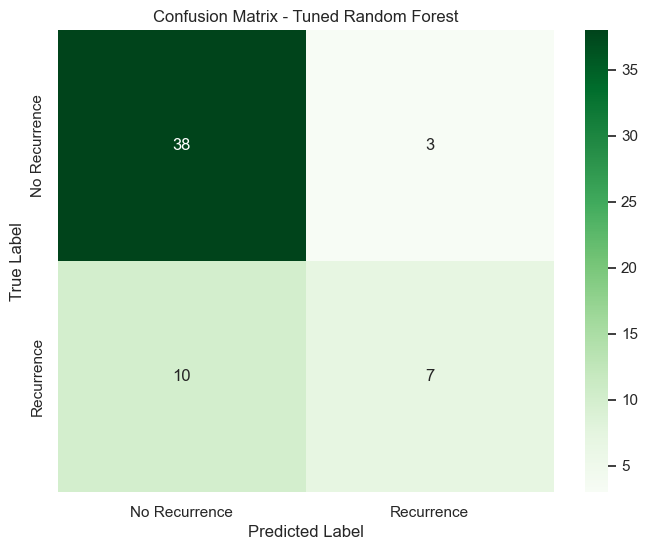


Classification Report - Tuned Random Forest:

               precision    recall  f1-score   support

No Recurrence       0.79      0.93      0.85        41
   Recurrence       0.70      0.41      0.52        17

     accuracy                           0.78        58
    macro avg       0.75      0.67      0.69        58
 weighted avg       0.76      0.78      0.76        58



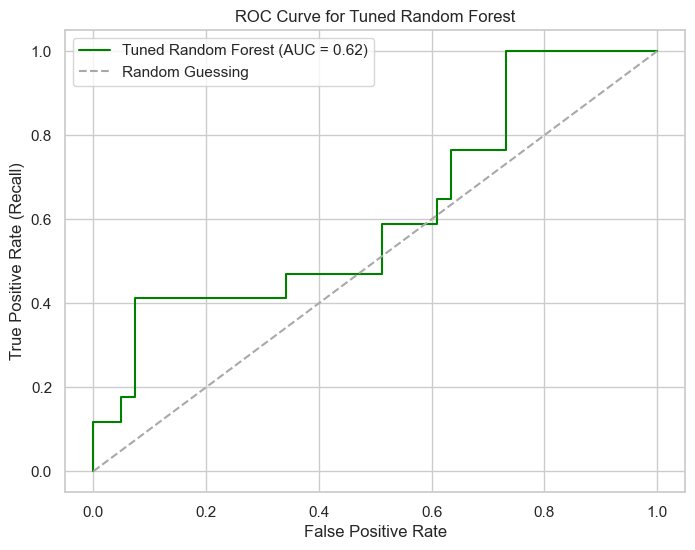

In [17]:
#Final model training and evaluation for tuned random forest
best_rf = grid_search.best_estimator_

#make predictions on the test set
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]  #probabilities for ROC curve

#output 1: confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Recurrence', 'Recurrence'],
            yticklabels=['No Recurrence', 'Recurrence'])
plt.title('Confusion Matrix - Tuned Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#output 2: classification report
print("\nClassification Report - Tuned Random Forest:\n")
print(classification_report(y_test, y_pred_rf, target_names=['No Recurrence', 'Recurrence']))

#output 3: ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)   
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Tuned Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for Tuned Random Forest')
plt.legend()
plt.grid(True)
plt.show()


***Random Forest analysis***

The final evaluation of the optimized random forest model on the unseen test set demonstrates a strong performance, confirming the success of the tuning efforts. The model achieved a final overall accuracy of 78%, which aligns pretty closely with the 79% cross validation accuracy from the training phase. This consistency is crucial, since it provides evidence that the efforts to mitigate overfitting were successful and that the model generalized well to the new data. 

The confusion matrix provides a granular view of the models predictions. The model was really good at identifying patients without recurrence, correctly classifying 38 out of 41 cases (true negatives) while only making 3 "false alarm" predictions (false positives). For the "recurrence" clas, the model correctly identified 7 out of the 17 actual recurrence cases (true positives). While it still missed 10 cases (false negatives), this shows an improvement in the ability to detect the minority class. 

The classification report quantifies these results, highlighting the model's strengths and weaknesses. For the "recurrence" class, the model achieved a recal of 0.41. This means that the model successfully identified 41% of all patients who experienced a recurrence, which is a big improvement in the detection capability. Futhermore, the precision for this class was 0.70, which shows that when a model did predict a recurrence, it was correct 70% of the time. This is a pretty good balance and shows that the model is cautious in its positive predictions, leading to fewer false alarms. 

Finally, the ROC curve provides a holistic measure of the model's diagnostic ability. The curve sits clearly above the line of random guessing and the resulting area under the curve of 0.62, while modest, confirms that the model can distinguish between the two classes. 

In conclusion, while not perfect, the random forest model is capable and well-generalized, and shows an improvement in identifying high-risk patients. 

**Overall Analysis and Review!!**

The objective of this project was to conduct a comprehensive data mining analysis to develop and evaluate machine learning models for predicting breast cancer recurrence. The process began with a thorough exploratory data analysis (EDA), which revealed several key characteristics that guided the modeling strategy. A significant class imbalance was immediately apparent, with "no-recurrence" events outnumbering "recurrence" events by more than two to one. This critical finding underscored the need to move beyond simple accuracy and focus on more nuanced evaluation metrics like recall and precision. The EDA also identified a clear hierarchy of predictive features; the tumor's intrinsic biological properties, such as the degree of malignancy, size, and extent of lymph node involvement, demonstrated a strong correlation with recurrence. This initial analysis provided a strong hypothesis about the data's structure before any modeling took place.

Following the exploratory phase, the data was pre-processed by imputing missing values with the mode and converting all categorical features into a numerical format using one-hot encoding. Two distinct classification techniques were then developed: a simple Logistic Regression model to serve as a performance baseline and a more complex Random Forest model as the required ensemble method. A central requirement of this project was to diagnose and address model overfitting, which occurs when a model learns the training data "too well," capturing noise and random fluctuations rather than the underlying pattern. Diagnostic analyses were performed on both models. The learning curve for the Logistic Regression model revealed that it was a stable, well-generalized model that did not suffer from overfitting, but its performance was limited by its simplicity (high bias). Conversely, the initial Random Forest model, while achieving a higher accuracy, was a classic case of an overfitted model. Its learning curve showed a definitive gap between a perfect training score of 1.0 and a much lower cross-validation score, proving it was not generalizing well.

The primary effort to combat this overfitting involved two techniques: cross-validation and regularization, implemented through a gridsearchCV. This process systematically searched for an optimal mode configuration by testing hyperparameters that constrain model complexity, such as max_depth and min_samples_split. The discovery that a finite max_depth of 10 eas optimal is direct evidence that this regularization was both necessary and effective. The final learning curve of the tuned model also provided visual proof of this success, showing that the gap between the training and validation scores has narrowed. This process helped mitigate the overfitting and improved the robust cross-validation from 76.4% to 79%.

The final and most critical phase of the project was the comparative evaluation of the two final models on a completely unseen test set. The results decisively established the superiority of the tuned Random Forest model. It achieved a higher overall accuracy of 78% compared to the Logistic Regression's 72%. More importantly, it showed a marked improvement in its ability to handle the class imbalance. The Random Forest achieved a recall of 0.41 for the "Recurrence" class, meaning it successfully identified 41% of the actual recurrence cases—a significant improvement over the Logistic Regression's recall of 0.35. Furthermore, its predictions of recurrence were far more reliable, with a precision of 0.70 compared to the Logistic Regression's 0.55. The Random Forest's clear superiority in the more interpretable and clinically relevant metrics of precision and recall confirms that it was the more effective model for this task.

While the tuned random forest model represents a large improvement, there are several avenues for future work that could enhance its predictive power. The most impactful next step would be to acquire a larger and more balanced dataset, as the model's performance is likely constrained by the limited number of positive examples. Additionally, exploring more advanced ensemble algorithms, such as Gradient Boosting Machines, could yield further performance gains.

The real-world impact of a successfully deployed model of this nature is substantial, serving as a powerful decision-support tool for clinicians. By providing a data-driven risk score for recurrence, the model could help oncologists stratify patients into risk groups, allowing for the development of personalized follow-up care plans. This not only leads to a more efficient allocation of healthcare resources but, more importantly, can lead to earlier detection of recurrence and improved long-term patient outcomes. Ultimately, this project serves as a demonstration of data mining's significance, showing its ability to transform historical clinical data into actionable insights that pave the way for a more personalized and proactive approach to patient care.


**Citations**

[1] M. Zwitter and M. Soklic, "Breast Cancer Data," UCI Machine Learning Repository, 1988. [Online]. Available: https://archive.ics.uci.edu/ml/datasets/breast+cancer. [Accessed: Oct. 8, 2025].

[2] D. L. Poole and A. K. Mackworth, Artificial Intelligence: Foundations of Computational Agents, 3rd ed. Cambridge, United Kingdom: Cambridge University Press, 2023.

[3] Scikit-learn Developers, "Scikit-learn: Machine Learning in Python," Scikit-learn.org, 2025. [Online]. Available: https://scikit-learn.org/stable/index.html. [Accessed: Oct. 12, 2025].

[4] M. Waskom et al., "seaborn: statistical data visualization," seaborn.pydata.org, 2025. [Online]. Available: https://seaborn.pydata.org/. [Accessed: Oct. 12, 2025].

[5] P.-N. Tan, M. Steinbach, A. Karpatne, and V. Kumar, Introduction to Data Mining, 2nd ed. Harlow, England: Pearson Education, 2018.

[6] Scikit-learn Developers, "sklearn.ensemble.RandomForestClassifier," Scikit-learn User Guide, 2025. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html. [Accessed: Oct. 12, 2025].

[7] "sklearn.preprocessing.OneHotEncoder," in scikit-learn, 2007. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html. [Accessed: Oct. 12, 2025].